# Lab 10

## I. Hill Climbing


The Hill Climbing Method is a simple optimization algorithm that tries to find the optimal solution to a problem by iteratively improving the current solution. It is a local search algorithm, which means that it only considers the solutions that are in the neighborhood of the current solution.

Here's how the Hill Climbing Method works:

1. Start with an initial state -- a candidate to the solution of the problem.

2. Evaluate the current state to determine its quality or fitness.

3. Generate a set of neighboring states by making small modifications to the current one.

3. Evaluate the fitness of each neighboring state.

4. Select the best neighboring state and make it the new current one.

5. Repeat steps 3 to 5 until no further improvement can be made or a predefined stopping criterion is met.

One of the main advantages of the Hill Climbing Method is its simplicity and ease of implementation. 

Consider the Bukin funcion N6, from the basic optimisation benchmark set:

$$f(x,y) =  100 \sqrt{|y-0.01 x^2|}+ 0.01 |x+10|.$$

For $-15 \leqq x \leqq -5$ and $-3 \leqq y \leqq 3$ we have a minimum point $f(-10, 1) = 0$.


*Ex. 1:*

Implement a function $f$ for this function and represent it graphic using matplotlib.

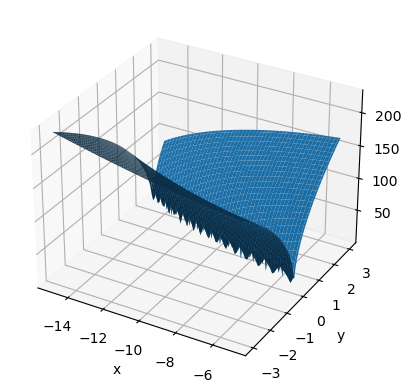

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def bukin(x, y):
    return 100 * np.sqrt(np.abs(y - 0.01 * (x ** 2))) + 0.01 * np.abs(x + 10)

# define the range of x and y values
x = np.linspace(-15, -5, 100)
y = np.linspace(-3, 3, 100)

# create a grid of x and y values to plot
X, Y = np.meshgrid(x, y)

# compute the value of the Bukin function N6 at each (x, y) point on the grid
Z = bukin(X, Y)

# create a new figure
fig = plt.figure()

# add a 3D subplot to the figure
ax = fig.add_subplot(111, projection = '3d')

# labels for x, y and f(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# plot the Bukin function N6 as a surface
ax.plot_surface(X, Y, Z)

plt.show()

*Ex. 2:* 

Write a Hill Climbing algorithm that finds this functions minimum.

Hints: 

define a state, define a neighbour, choose a proper stop criteria before implementing the algorithm.

In [2]:
def get_neighbors(state):
    step = 0.01
    neighbor_states = []
    for dx in [-1, 0, 1]:
        for dy in [-1, 0, 1]:
            neighbor = state + step * np.array([dx, dy])
            neighbor_states.append(neighbor)
        
    return neighbor_states


def hill_climb(states, max_iter = 10000):
    step = 0.01
    for _ in range(max_iter):
        x, y = states
        current_eval = bukin(x, y)
        next_states = get_neighbors(states)

        next_new_states = []
        for new_state in next_states:
            x, y = new_state
            next_new_states.append(bukin(x, y))

        if min(next_new_states) >= current_eval:
            break
        
        states = next_states[np.argmin(next_new_states)]
        
    return states

found_at = hill_climb(np.array([-11, 1]))
X, Y = found_at
value = bukin(X, Y)
print(f"The min was fount at: {found_at}, with the value {value}")

The min was fount at: [-10.82   1.17], with the value 2.698924809416294


*Ex. 3:* for 1 point 

Implement a hill climbing algorithm for the knapsack problem. 

Hints:
For n elements:

we begin with an empty string of n zeros.

a neighbour is constructed by switching of zero into an one at a position in the array

Does it find the optimum? 


In [3]:
def check_kanpsack(solution, values, weights, capacity):
    total_value = np.sum(solution * values)
    total_weight = np.sum(solution * weights)
    
    if total_weight > capacity:
        return 0  
    return total_value


def hillclimb_knapsack(values, weights, capacity, max_iterations=1000):
    length = len(values)
    ans = np.zeros(length)
    
    current_value = check_kanpsack(ans, values, weights, capacity)
    
    for _ in range(max_iterations):
        neighbor_ans = ans.copy()
        index = np.random.randint(length)
        neighbor_ans[index] = 1 - neighbor_ans[index]
        
        neighbor_value = check_kanpsack(neighbor_ans, values, weights, capacity)
        
        if neighbor_value > current_value :
            ans = neighbor_ans
            current_val = neighbor_value
            
        if np.all(ans == 1) or np.all(ans == 0): # stop criterion
            break
    
    
    return ans
    

values = np.array([60, 50, 70, 30])
weights = np.array([5, 3, 4, 2])
capacity = 5

ans = hillclimb_knapsack(values, weights, capacity)
print(ans, ": ", check_kanpsack(ans, values, weights, capacity))

[0. 1. 0. 0.] :  50.0



*Ex. 4:* for 1 point

Improve it to increase the chances of finding the solution.  

In [4]:
def hill_climb_knapsack(values, weights, capacity, num_restarts=10, max_iterations=1000):
    ans = None
    best = -np.inf
    
    for _ in range(num_restarts):
        now = hillclimb_knapsack(values, weights, capacity, max_iterations)
        value = check_kanpsack(now, values, weights, capacity)
        
        if value > best:
            ans = now
            best = value
            
    return ans

ans = hill_climb_knapsack(values, weights, capacity)
print(ans, ": ", check_kanpsack(ans, values, weights, capacity))

[0. 1. 0. 1.] :  80.0
